In [1]:

using Zygote

using Plots

# ╔═╡ 440f31ed-92a4-4c96-b0ef-0f4a2e75e4f3
using Flux

# ╔═╡ 458f5a9a-61ad-46f5-876f-4e4babf7c3c1
using Statistics



In [2]:


# ╔═╡ 3cc84092-1891-4680-9f32-70630399760f
a=9

# ╔═╡ ab94c6ac-23eb-4c3b-a654-d405de3fb292
b=8

# ╔═╡ 6fa06f29-7fa1-42ab-8cda-cd99fc9210a7
xVec = 1:100

# ╔═╡ 11b46b5d-d021-401a-af88-9f7669d577d8
fVec(x,a,b) = x.*a .+b


fVec (generic function with 1 method)

In [3]:

# ╔═╡ 4cd54612-acb6-4dbd-8c41-58e0dddac59e
mean(sqrt.((fVec(xVec,a,b).-fVec(xVec,2,4)).^2))

357.5

In [4]:

# ╔═╡ cd4a31ab-cb41-406c-a49e-129e60457e44
f(x,a,b) = a*x + b

# ╔═╡ e805e4e8-6bdd-438f-ab57-c21b49419f71
loss(yTrue,yPred) = sqrt((yTrue-yPred)^2)

# ╔═╡ aec98c78-4f8c-4ba5-971b-9c8da89944ef
gradient(f,randn(1)[1],3,4)

(3.0, 1.6598937265661065, 1.0)

In [5]:

# ╔═╡ b892e1a1-f40a-4fc4-9800-a0b5275ceea9
d =3

# ╔═╡ 082957bf-447f-4347-8888-57ded99bf41a
e = 2

# ╔═╡ 12bb97d9-a540-4cea-8eab-8a24d877aa99
function twoSteps(x,a,b,yTrue)
	out = f(x,a,b)
	out2 = f(out,a,b)
	return loss(yTrue, out2)
end

# ╔═╡ de3fac10-1b8c-445e-a0e4-1bb3789a8c0a
gradient(twoSteps,randn(1)[1],3,4,4)

(9.0, 4.971265514735835, 4.0, -1.0)

In [6]:


# ╔═╡ 49fb10da-cd1d-4397-9668-d3a032a0217e
function oneStep(x,a,b,yTrue)
	out = f(x,a,b)
	lossVal = loss(yTrue,out)
	return lossVal
end

# ╔═╡ c36111d6-083f-4a11-8147-e41ba0dba146
batches = rand(5)

# ╔═╡ 6ebc7672-c3f2-48fc-a367-0a3e0630a75e
lengthLine = 50

# ╔═╡ faaf05ba-5c63-4170-b102-e5b6145f034b
target_a =25

# ╔═╡ db42b151-a980-4b9a-bc1c-d766ac3c8bf6
target_b =150
# ╔═╡ e2662a5c-be71-4ab0-a9f1-3dbcfaddbdcb
noiseFac =40

# ╔═╡ 3f7d6c8a-8b6a-4861-bb5f-a31fc23dc626
begin
	line = ones(lengthLine)
	for idx in range(1,length=length(line))
		line[idx] = f(idx,target_a,target_b)
	end
	noisyLine = line .+ randn(length(line))*noiseFac
end


50-element Vector{Float64}:
  114.61553007726349
  185.9003566881315
  238.01236559722312
  301.75630592457304
  234.61244579892045
  285.7590067933595
  332.09344680737195
  340.8048275634911
  394.63454470810444
  382.11893615520023
  403.8191129077956
  390.11759623842914
  530.4050232179923
    ⋮
 1152.2490331572562
 1187.8171899999727
 1213.9367490774514
 1182.6597646479797
 1195.7085267714776
 1276.866133116826
 1282.28089767292
 1247.555331689457
 1298.2886977756068
 1307.0824926908329
 1373.086215396479
 1410.3044037275968

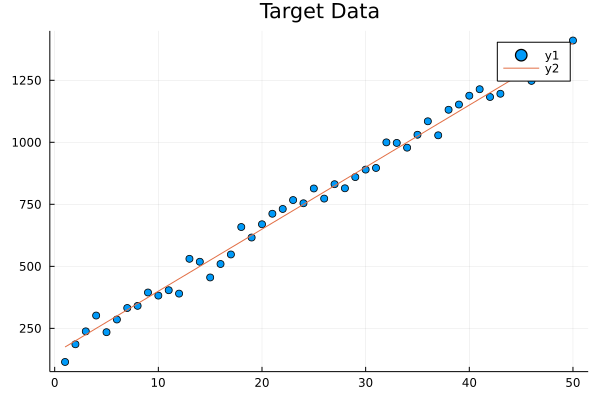

In [7]:

# ╔═╡ 25174bbb-3fec-4426-961b-51d84a0ebcab
begin
	plot([1:length(noisyLine)],noisyLine,seriestype = :scatter,title="Target Data")
	plot!([1:length(noisyLine)],line)
end

In [8]:

# ╔═╡ 5d10496e-3e15-428f-8d7e-aa2c4bec8fe8
begin
	lr = 0.01
	epochs = 100
	aVals = []
	losses = []
	a1 = rand(1)[1]
	b1 = rand(1)[1]*10
	xVals = 1:1:lengthLine
	for e in 1:epochs
		for xIdx in 1:lengthLine
			l, grads = withgradient(oneStep,xVals[xIdx],a1,b1,line[xIdx])
			a1 -= grads[2]*lr
			b1 -= grads[3]*lr
			append!(aVals,a1)
			append!(losses,l)
		end
	end
end

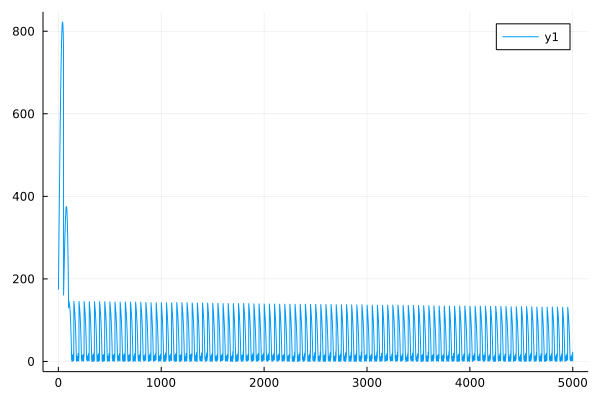

In [9]:

# ╔═╡ 71c71fc7-f759-4c6b-b7c1-ba5471de8e33
plot([1:length(losses)],losses)


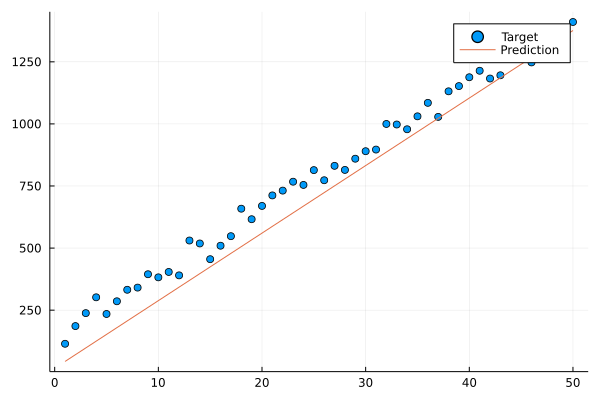

In [10]:


# ╔═╡ 952ee59d-7e95-44db-8b1c-0a8e112a5e84
begin
	linePred = ones(lengthLine)
	for idx in range(1,length=length(line))
		linePred[idx] = f(idx,a1,b1)
	end
end

# ╔═╡ 5726fac0-d058-462c-8be5-bb3dcc5900ee
begin
plot(1:lengthLine,noisyLine,seriestype = :scatter,label="Target")
plot!(1:lengthLine, linePred,label="Prediction")
end

In [11]:

# ╔═╡ 34e09471-5444-4e4d-ab2f-04c5c498cb99
lossVec(yTrue,out) = mean(sqrt.((yTrue.-out).^2))

# ╔═╡ 41c1cab9-425b-45ad-b0ba-c3b084fadd93
function oneStepVec(x,a,b,yTrue)
	out = fVec(x,a,b)
	lossVal = lossVec(yTrue,out)
	return lossVal
end

# ╔═╡ 49fdcd3c-e442-46bb-9ba9-8612865959f4


oneStepVec (generic function with 1 method)

In [12]:
xValsVec = 1:lengthLine

1:50

In [13]:


# ╔═╡ 75183a67-de3d-4e2e-99bc-7f054847de5a
function transform(x)
	xStd = std(x)
	xMean = mean(x)
	xTransform = (x.-xMean) ./ xStd
	return xTransform, xStd, xMean
end

# ╔═╡ 02fa7b5e-d21b-4505-bc7f-488aeaf5dccf
function invTransform(x,xStd,xMean)
	(x.*xStd).+xMean
end

invTransform (generic function with 1 method)

In [14]:



# ╔═╡ ad8bf527-f56b-4fa1-826c-56778f7a678a
begin
	xValsVecTr, xStd, xMean = transform(xValsVec)
	lineTr, lineStd, lineMean = transform(line)
end

# ╔═╡ 6e4d119b-e711-4878-8163-abb022708590
line == invTransform(lineTr, lineStd, lineMean)


false

In [15]:

# ╔═╡ cf9436e8-686b-4c4e-babb-174b0eab1166
function runDesc(lrVec,epochsVec)
	lossesVec = []
	a2 = randn(1)[1]
	b2 = randn(1)[1]
	for e in 1:epochsVec
		lVec, gradsVec = withgradient(oneStepVec,xValsVecTr,a2,b2,lineTr)
		a2 -= gradsVec[2]*lrVec
		b2 -= gradsVec[3]*lrVec
		append!(lossesVec,lVec)
	end
	return lossesVec, a2,b2
end

runDesc (generic function with 1 method)

In [16]:

lossesVec2, aPred,bPred = runDesc(1e-2, 240)


(Any[1.777024706948698, 1.7697874175369332, 1.7625501281251683, 1.7553128387134038, 1.748075549301639, 1.7408382598898742, 1.7336009704781095, 1.7263636810663445, 1.7191263916545798, 1.7118891022428153  …  0.12800500507800935, 0.12105684507800935, 0.11410868507800938, 0.1071924108674203, 0.1003258508674203, 0.09345929086742027, 0.08659273086742028, 0.07972617086742026, 0.07285961086742025, 0.06602153786554643], 0.9401911664220195, 0.040383387883273975)

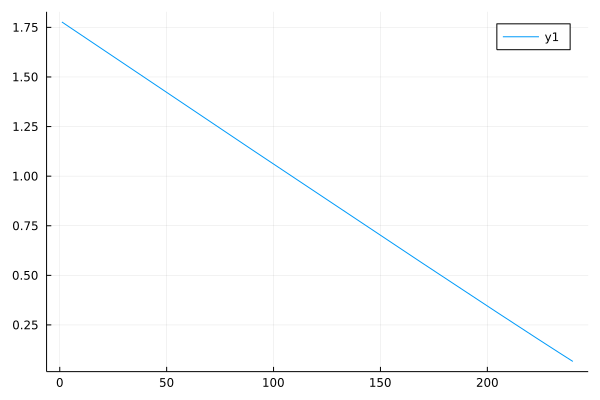

In [17]:

# ╔═╡ 4b777386-0c74-4a66-aecd-cd18dcf5f843
plot(1:length(lossesVec2),lossesVec2)

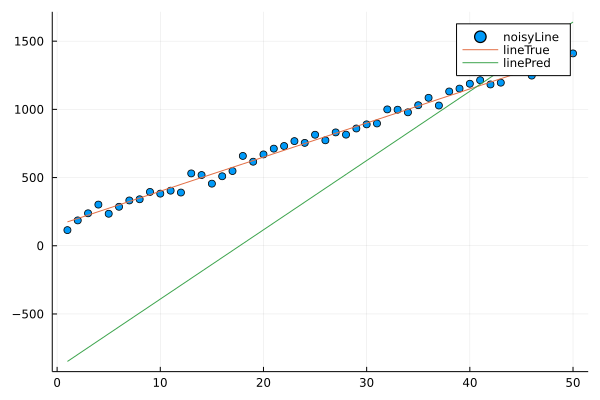

In [18]:


# ╔═╡ e2a55ff6-5b93-45a6-bb4e-4f8eb17c0391
linePredVec = fVec(xValsVecTr, aPred,bPred)

# ╔═╡ 4e11e240-7813-4ca7-8834-84404b8ef534
lineTrue = fVec(xValsVec, target_a,target_b)

# ╔═╡ 15f0314d-51f6-4c13-9f17-3ddb661354fc
begin
	plot(1:lengthLine,noisyLine,seriestype = :scatter,label="noisyLine")
	plot!(1:lengthLine, lineTrue,label="lineTrue")
	plot!(1:lengthLine, invTransform(linePredVec,lineMean,lineStd),label="linePred")
end

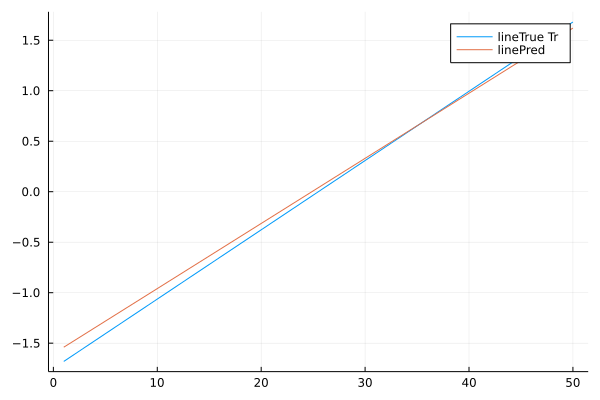

In [19]:

# ╔═╡ 9dc41a6c-6df0-4792-bb0c-bf3c64d5573b
begin
	#plot(1:lengthLine,noisyLine,seriestype = :scatter,label="noisyLine")
	plot(1:lengthLine, transform(lineTrue),label="lineTrue Tr")
	plot!(1:lengthLine, linePredVec,label="linePred")
end


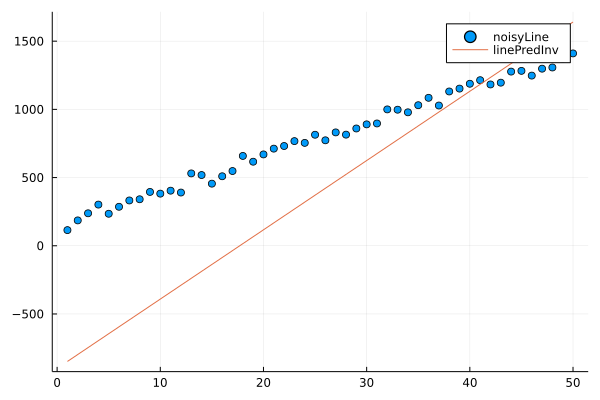

In [20]:


begin
	linePredInv = invTransform(linePredVec,lineMean,lineStd)
	
	plot(1:lengthLine,noisyLine,seriestype = :scatter,label="noisyLine")
	
	plot!(1:lengthLine, linePredInv,label="linePredInv")
end
